In [1]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point, Polygon, LineString, MultiLineString
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns', 500)

In [3]:
# Loading the data 
path = './Data/'
filename ='city_code_en.csv'
filename2 = 'flow_20200110_20200430_all.csv'
filename3 = 'flow_20190121_20190301.csv'

# loading city code file
df1 = pd.read_csv(path+filename)
df1.head()

,city_id,city_name,pro_id,pro_name
0,110000,Beijing,110000,Beijing
1,120000,Tianjin,120000,Tianjin
2,131100,Hengshui,130000,Hebei Province
3,130100,Shijiazhuang City,130000,Hebei Province
4,130200,Tangshan,130000,Hebei Province


In [4]:
df1.dtypes

city_id      object
city_name    object
pro_id       object
pro_name     object
dtype: object

In [4]:
# loading the shape file
prov_map=gpd.read_file('./shape/province.shp')
prov_map.head()

,GB,COUNT,SUM_AREA,SUM_PERIME,NAME_PINGY,NMAE_CHINE,X,Y,geometry
0,110000,15,1.663132e+10,2.374422e+06,Beijing Shi,±± ¾©,9.613544e+05,6.465288e+05,"POLYGON ((951820.688 567831.625, 949230.875 56..."
1,120000,12,1.172079e+10,1.732932e+06,Tianjin Shi,Ìì ½ò,1.056399e+06,5.615172e+05,"POLYGON ((1040181.938 652748.188, 1042009.688 ..."
2,130000,164,1.877371e+11,2.458679e+07,Hebei Sheng,ºÓ ±±,9.947101e+05,5.419364e+05,"MULTIPOLYGON (((1158051.375 518894.063, 115706..."
3,140000,107,1.566814e+11,1.964542e+07,Shanxi Sheng,É½ Î÷,6.418249e+05,3.245150e+05,"POLYGON ((661683.188 617970.813, 661304.000 61..."
4,150000,88,1.131067e+12,4.697479e+07,Neimenggu Zizhiqu,ÄÚÃÉ¹Å,1.049132e+06,1.199866e+06,"POLYGON ((1251883.000 2027025.625, 1252366.250..."


<AxesSubplot:>

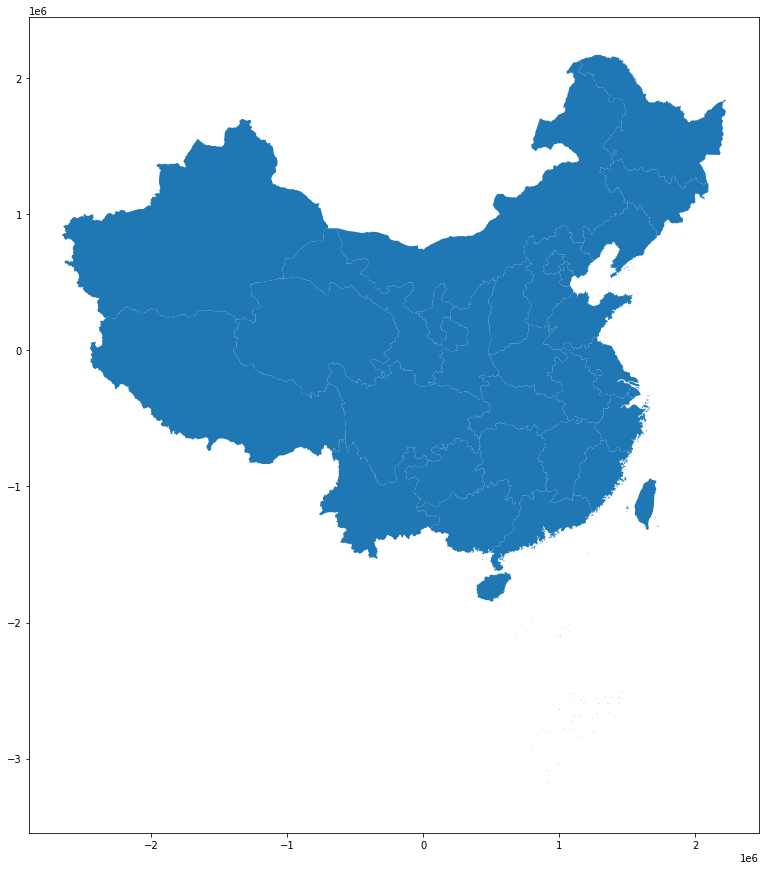

In [5]:
# plotting boundaries with the shapefile
fig,ax = plt.subplots(figsize =(15,15))
prov_map.plot(ax = ax)

## Data cleaning and Aggregation

In [6]:
# Reading in the mobility data
df2=pd.read_csv(path+filename2)
crs={'init':'EPSG:4326'}
df2.head()

,到达城市,出发城市,出发省份,到达省份,city_id_o,X_o,Y_o,city_id_d,X_d,Y_d,20200110,20200111,20200112,20200113,20200114,20200115,20200116,20200117,20200118,20200119,20200120,20200121,20200122,20200123,20200124,20200125,20200126,20200127,20200128,20200129,20200130,20200131,20200201,20200202,20200203,20200204,20200205,20200206,20200207,20200208,20200209,20200210,20200211,20200212,20200213,20200214,20200215,20200216,20200217,20200218,20200219,20200220,20200221,20200222,20200223,20200224,20200225,20200226,20200227,20200228,20200229,20200301,20200302,20200303,20200304,20200305,20200306,20200307,20200308,20200309,20200310,20200311,20200312,20200313,20200314,20200315,20200316,20200317,20200318,20200319,20200320,20200321,20200322,20200323,20200324,20200325,20200326,20200327,20200328,20200329,20200330,20200331,20200401,20200402,20200403,20200404,20200405,20200406,20200407,20200408,20200409,20200410,20200411,20200412,20200413,20200414,20200415,20200416,20200417,20200418,20200419,20200420,20200421,20200422,20200423,20200424,20200425,20200426,20200427,20200428,20200429,20200430
0,七台河市,万宁市,海南省,黑龙江省,469006.0,110.395985,18.795179,230900.0,130.9292,45.7842,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,2,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,7,4,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,2,0,0,0
1,七台河市,三亚市,海南省,黑龙江省,460200.0,109.508000,18.256600,230900.0,130.9292,45.7842,3,3,5,6,3,4,3,7,4,4,4,4,6,3,6,6,3,4,2,3,12,4,4,2,2,8,2,8,3,3,5,0,1,2,4,2,2,5,1,5,0,2,0,8,1,4,5,0,0,4,3,3,0,13,3,2,3,2,4,5,9,6,5,6,0,0,1,1,2,1,4,4,2,6,1,8,3,3,3,3,3,5,6,2,3,3,6,2,4,2,1,5,15,11,1,7,7,2,6,2,6,6,4,3,1,4,2,9,2,0,1,0
2,七台河市,三明市,福建省,黑龙江省,350400.0,117.629800,26.265600,230900.0,130.9292,45.7842,0,0,0,0,1,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
3,七台河市,三沙市,海南省,黑龙江省,460300.0,112.334000,16.832200,230900.0,130.9292,45.7842,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,七台河市,三门峡市,河南省,黑龙江省,411200.0,111.196200,34.774600,230900.0,130.9292,45.7842,0,0,0,0,0,0,1,2,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [7]:
df2["city_id_o"]=df2["city_id_o"].astype(int)

In [8]:
df2["city_id_d"]=df2["city_id_d"].astype(int)

In [9]:
df2["city_id_o"]=df2["city_id_o"].astype(str)

In [10]:
df2["city_id_d"]=df2["city_id_d"].astype(str)

In [11]:
df2.head()

,到达城市,出发城市,出发省份,到达省份,city_id_o,X_o,Y_o,city_id_d,X_d,Y_d,20200110,20200111,20200112,20200113,20200114,20200115,20200116,20200117,20200118,20200119,20200120,20200121,20200122,20200123,20200124,20200125,20200126,20200127,20200128,20200129,20200130,20200131,20200201,20200202,20200203,20200204,20200205,20200206,20200207,20200208,20200209,20200210,20200211,20200212,20200213,20200214,20200215,20200216,20200217,20200218,20200219,20200220,20200221,20200222,20200223,20200224,20200225,20200226,20200227,20200228,20200229,20200301,20200302,20200303,20200304,20200305,20200306,20200307,20200308,20200309,20200310,20200311,20200312,20200313,20200314,20200315,20200316,20200317,20200318,20200319,20200320,20200321,20200322,20200323,20200324,20200325,20200326,20200327,20200328,20200329,20200330,20200331,20200401,20200402,20200403,20200404,20200405,20200406,20200407,20200408,20200409,20200410,20200411,20200412,20200413,20200414,20200415,20200416,20200417,20200418,20200419,20200420,20200421,20200422,20200423,20200424,20200425,20200426,20200427,20200428,20200429,20200430
0,七台河市,万宁市,海南省,黑龙江省,469006,110.395985,18.795179,230900,130.9292,45.7842,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,2,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,7,4,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,2,0,0,0
1,七台河市,三亚市,海南省,黑龙江省,460200,109.508000,18.256600,230900,130.9292,45.7842,3,3,5,6,3,4,3,7,4,4,4,4,6,3,6,6,3,4,2,3,12,4,4,2,2,8,2,8,3,3,5,0,1,2,4,2,2,5,1,5,0,2,0,8,1,4,5,0,0,4,3,3,0,13,3,2,3,2,4,5,9,6,5,6,0,0,1,1,2,1,4,4,2,6,1,8,3,3,3,3,3,5,6,2,3,3,6,2,4,2,1,5,15,11,1,7,7,2,6,2,6,6,4,3,1,4,2,9,2,0,1,0
2,七台河市,三明市,福建省,黑龙江省,350400,117.629800,26.265600,230900,130.9292,45.7842,0,0,0,0,1,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
3,七台河市,三沙市,海南省,黑龙江省,460300,112.334000,16.832200,230900,130.9292,45.7842,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,七台河市,三门峡市,河南省,黑龙江省,411200,111.196200,34.774600,230900,130.9292,45.7842,0,0,0,0,0,0,1,2,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [13]:
# Dropping the columns in foreign language
df2.drop(df2.iloc[:, 0:4], axis=1, inplace=True)
df2.head()

,city_id_o,X_o,Y_o,city_id_d,X_d,Y_d,20200110,20200111,20200112,20200113,20200114,20200115,20200116,20200117,20200118,20200119,20200120,20200121,20200122,20200123,20200124,20200125,20200126,20200127,20200128,20200129,20200130,20200131,20200201,20200202,20200203,20200204,20200205,20200206,20200207,20200208,20200209,20200210,20200211,20200212,20200213,20200214,20200215,20200216,20200217,20200218,20200219,20200220,20200221,20200222,20200223,20200224,20200225,20200226,20200227,20200228,20200229,20200301,20200302,20200303,20200304,20200305,20200306,20200307,20200308,20200309,20200310,20200311,20200312,20200313,20200314,20200315,20200316,20200317,20200318,20200319,20200320,20200321,20200322,20200323,20200324,20200325,20200326,20200327,20200328,20200329,20200330,20200331,20200401,20200402,20200403,20200404,20200405,20200406,20200407,20200408,20200409,20200410,20200411,20200412,20200413,20200414,20200415,20200416,20200417,20200418,20200419,20200420,20200421,20200422,20200423,20200424,20200425,20200426,20200427,20200428,20200429,20200430
0,469006,110.395985,18.795179,230900,130.9292,45.7842,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,2,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,7,4,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,2,0,0,0
1,460200,109.508000,18.256600,230900,130.9292,45.7842,3,3,5,6,3,4,3,7,4,4,4,4,6,3,6,6,3,4,2,3,12,4,4,2,2,8,2,8,3,3,5,0,1,2,4,2,2,5,1,5,0,2,0,8,1,4,5,0,0,4,3,3,0,13,3,2,3,2,4,5,9,6,5,6,0,0,1,1,2,1,4,4,2,6,1,8,3,3,3,3,3,5,6,2,3,3,6,2,4,2,1,5,15,11,1,7,7,2,6,2,6,6,4,3,1,4,2,9,2,0,1,0
2,350400,117.629800,26.265600,230900,130.9292,45.7842,0,0,0,0,1,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
3,460300,112.334000,16.832200,230900,130.9292,45.7842,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,411200,111.196200,34.774600,230900,130.9292,45.7842,0,0,0,0,0,0,1,2,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [14]:
df2["origin_city"] = df2["city_id_o"].map(df1.set_index("city_id")["city_name"])
df2["dest_city"] = df2["city_id_d"].map(df1.set_index("city_id")["city_name"])
df2["origin_province"] = df2["city_id_o"].map(df1.set_index("city_id")["pro_name"])
df2["dest_province"] = df2["city_id_d"].map(df1.set_index("city_id")["pro_name"])

In [15]:
df2.head()

,city_id_o,X_o,Y_o,city_id_d,X_d,Y_d,20200110,20200111,20200112,20200113,20200114,20200115,20200116,20200117,20200118,20200119,20200120,20200121,20200122,20200123,20200124,20200125,20200126,20200127,20200128,20200129,20200130,20200131,20200201,20200202,20200203,20200204,20200205,20200206,20200207,20200208,20200209,20200210,20200211,20200212,20200213,20200214,20200215,20200216,20200217,20200218,20200219,20200220,20200221,20200222,20200223,20200224,20200225,20200226,20200227,20200228,20200229,20200301,20200302,20200303,20200304,20200305,20200306,20200307,20200308,20200309,20200310,20200311,20200312,20200313,20200314,20200315,20200316,20200317,20200318,20200319,20200320,20200321,20200322,20200323,20200324,20200325,20200326,20200327,20200328,20200329,20200330,20200331,20200401,20200402,20200403,20200404,20200405,20200406,20200407,20200408,20200409,20200410,20200411,20200412,20200413,20200414,20200415,20200416,20200417,20200418,20200419,20200420,20200421,20200422,20200423,20200424,20200425,20200426,20200427,20200428,20200429,20200430,origin_city,dest_city,origin_province,dest_province
0,469006,110.395985,18.795179,230900,130.9292,45.7842,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,2,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,7,4,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,2,0,0,0,Wanning,Qitaihe,Hainan,Heilongjiang Province
1,460200,109.508000,18.256600,230900,130.9292,45.7842,3,3,5,6,3,4,3,7,4,4,4,4,6,3,6,6,3,4,2,3,12,4,4,2,2,8,2,8,3,3,5,0,1,2,4,2,2,5,1,5,0,2,0,8,1,4,5,0,0,4,3,3,0,13,3,2,3,2,4,5,9,6,5,6,0,0,1,1,2,1,4,4,2,6,1,8,3,3,3,3,3,5,6,2,3,3,6,2,4,2,1,5,15,11,1,7,7,2,6,2,6,6,4,3,1,4,2,9,2,0,1,0,Sanya,Qitaihe,Hainan,Heilongjiang Province
2,350400,117.629800,26.265600,230900,130.9292,45.7842,0,0,0,0,1,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,Sanming,Qitaihe,Fujian Province,Heilongjiang Province
3,460300,112.334000,16.832200,230900,130.9292,45.7842,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Sansha,Qitaihe,Hainan,Heilongjiang Province
4,411200,111.196200,34.774600,230900,130.9292,45.7842,0,0,0,0,0,0,1,2,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Sanmenxia,Qitaihe,Henan Province,Heilongjiang Province


In [16]:
df2["origin_city"] = df2["origin_city"].str.replace("City","")
df2["origin_province"] = df2["origin_province"].str.replace("Province","")
df2["dest_city"] = df2["dest_city"].str.replace("City","")
df2["dest_province"] = df2["dest_province"].str.replace("Province","")

In [17]:
# Aggregating weekly data for the whole data file
a= df2.set_index(['origin_city','origin_province','city_id_o','X_o','Y_o','dest_city','dest_province','city_id_d','X_d','Y_d']).rename(columns=lambda x: pd.to_datetime(x))
a = a.resample('W', axis=1).sum().reset_index()
a.head(20)

,origin_city,origin_province,city_id_o,X_o,Y_o,dest_city,dest_province,city_id_d,X_d,Y_d,2020-01-12 00:00:00,2020-01-19 00:00:00,2020-01-26 00:00:00,2020-02-02 00:00:00,2020-02-09 00:00:00,2020-02-16 00:00:00,2020-02-23 00:00:00,2020-03-01 00:00:00,2020-03-08 00:00:00,2020-03-15 00:00:00,2020-03-22 00:00:00,2020-03-29 00:00:00,2020-04-05 00:00:00,2020-04-12 00:00:00,2020-04-19 00:00:00,2020-04-26 00:00:00,2020-05-03 00:00:00
0,Wanning,Hainan,469006,110.395985,18.795179,Qitaihe,Heilongjiang,230900,130.9292,45.7842,0,0,0,2,3,1,2,0,12,2,0,0,0,1,2,0,2
1,Sanya,Hainan,460200,109.508000,18.256600,Qitaihe,Heilongjiang,230900,130.9292,45.7842,11,31,32,31,31,16,17,19,27,31,15,27,28,40,31,29,3
2,Sanming,Fujian,350400,117.629800,26.265600,Qitaihe,Heilongjiang,230900,130.9292,45.7842,0,4,0,0,1,0,0,0,0,0,0,0,0,3,0,2,0
3,Sansha,Hainan,460300,112.334000,16.832200,Qitaihe,Heilongjiang,230900,130.9292,45.7842,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Sanmenxia,Henan,411200,111.196200,34.774600,Qitaihe,Heilongjiang,230900,130.9292,45.7842,0,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
5,Shanghai,Shanghai,310000,121.468600,31.232000,Qitaihe,Heilongjiang,230900,130.9292,45.7842,47,170,232,66,11,6,7,10,11,11,18,17,32,20,29,23,17
6,Shangrao,Jiangxi,361100,117.962000,28.447800,Qitaihe,Heilongjiang,230900,130.9292,45.7842,2,3,1,0,0,0,0,0,0,0,0,2,0,0,0,0,0
7,Dongfang,Hainan,469007,108.663741,19.089627,Qitaihe,Heilongjiang,230900,130.9292,45.7842,0,1,4,4,9,4,1,4,2,6,1,3,7,2,11,14,0
8,Dongguan city,Guangdong,441900,113.746800,23.021800,Qitaihe,Heilongjiang,230900,130.9292,45.7842,4,24,16,5,2,0,0,0,2,5,1,5,2,4,10,6,1
9,Dongying,Shandong,370500,118.654000,37.422400,Qitaihe,Heilongjiang,230900,130.9292,45.7842,31,37,7,5,2,0,0,1,2,3,1,0,1,3,1,1,1


In [18]:
#saving the weekly aggregated file
#df2.to_csv('./Data/weekly_aggregation_final.csv')

In [19]:
a.shape

(133590, 27)

In [20]:
# Aggregating by month
a_m= df2.set_index(['origin_city','origin_province','city_id_o','X_o','Y_o','dest_city','dest_province','city_id_d','X_d','Y_d']).rename(columns=lambda x: pd.to_datetime(x))
a_m = a_m.resample('M', axis=1).sum().reset_index()
a_m.head(20)

,origin_city,origin_province,city_id_o,X_o,Y_o,dest_city,dest_province,city_id_d,X_d,Y_d,2020-01-31 00:00:00,2020-02-29 00:00:00,2020-03-31 00:00:00,2020-04-30 00:00:00
0,Wanning,Hainan,469006,110.395985,18.795179,Qitaihe,Heilongjiang,230900,130.9292,45.7842,2,6,14,5
1,Sanya,Hainan,460200,109.508000,18.256600,Qitaihe,Heilongjiang,230900,130.9292,45.7842,99,86,111,123
2,Sanming,Fujian,350400,117.629800,26.265600,Qitaihe,Heilongjiang,230900,130.9292,45.7842,4,1,0,5
3,Sansha,Hainan,460300,112.334000,16.832200,Qitaihe,Heilongjiang,230900,130.9292,45.7842,0,0,0,0
4,Sanmenxia,Henan,411200,111.196200,34.774600,Qitaihe,Heilongjiang,230900,130.9292,45.7842,5,0,1,0
5,Shanghai,Shanghai,310000,121.468600,31.232000,Qitaihe,Heilongjiang,230900,130.9292,45.7842,510,38,69,110
6,Shangrao,Jiangxi,361100,117.962000,28.447800,Qitaihe,Heilongjiang,230900,130.9292,45.7842,6,0,2,0
7,Dongfang,Hainan,469007,108.663741,19.089627,Qitaihe,Heilongjiang,230900,130.9292,45.7842,6,21,15,31
8,Dongguan city,Guangdong,441900,113.746800,23.021800,Qitaihe,Heilongjiang,230900,130.9292,45.7842,49,2,13,23
9,Dongying,Shandong,370500,118.654000,37.422400,Qitaihe,Heilongjiang,230900,130.9292,45.7842,79,4,6,7


In [21]:
# Describing the aggregation by week
a.describe()

,X_o,Y_o,X_d,Y_d,2020-01-12 00:00:00,2020-01-19 00:00:00,2020-01-26 00:00:00,2020-02-02 00:00:00,2020-02-09 00:00:00,2020-02-16 00:00:00,2020-02-23 00:00:00,2020-03-01 00:00:00,2020-03-08 00:00:00,2020-03-15 00:00:00,2020-03-22 00:00:00,2020-03-29 00:00:00,2020-04-05 00:00:00,2020-04-12 00:00:00,2020-04-19 00:00:00,2020-04-26 00:00:00,2020-05-03 00:00:00
count,133590.000000,133590.000000,133590.000000,133590.000000,133590.000000,133590.000000,133590.000000,133590.000000,133590.000000,133590.000000,133590.000000,133590.000000,133590.000000,133590.000000,133590.000000,133590.000000,133590.000000,133590.000000,133590.000000,133590.000000,133590.000000
mean,110.879881,32.676788,110.879881,32.676788,313.253470,749.462961,755.931582,296.219440,150.147631,123.143244,191.102395,292.257579,316.004484,345.282469,382.664129,405.844157,496.889049,452.915188,423.539614,404.968553,247.170694
std,10.323724,7.375042,10.323724,7.375042,2856.563525,5926.825595,6171.605195,2351.942713,1337.033554,1153.209859,1663.913186,2533.343186,2982.608122,3427.358708,3791.178338,4032.744581,4853.443380,4379.578678,4347.369672,4224.588353,2438.349814
min,75.992600,16.832200,75.992600,16.832200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,106.226800,27.368800,106.226800,27.368800,1.000000,4.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,112.669439,32.170500,112.669439,32.170500,9.000000,24.000000,20.000000,8.000000,3.000000,2.000000,4.000000,6.000000,7.000000,7.000000,10.000000,10.000000,10.000000,11.000000,10.000000,9.000000,6.000000
75%,117.478800,37.869600,117.478800,37.869600,49.000000,128.000000,114.000000,47.000000,17.000000,14.000000,24.000000,39.000000,43.000000,45.000000,53.000000,55.000000,57.000000,59.000000,54.000000,51.000000,34.000000
max,131.151400,52.451053,131.151400,52.451053,238145.000000,438085.000000,434504.000000,129689.000000,74333.000000,99046.000000,134575.000000,200937.000000,257190.000000,310956.000000,340345.000000,365848.000000,410584.000000,366147.000000,406575.000000,388885.000000,211469.000000


In [22]:
# Describing the aggregation by week
a_m.describe()

,X_o,Y_o,X_d,Y_d,2020-01-31 00:00:00,2020-02-29 00:00:00,2020-03-31 00:00:00,2020-04-30 00:00:00
count,133590.000000,133590.000000,133590.000000,133590.000000,1.335900e+05,133590.000000,1.335900e+05,1.335900e+05
mean,110.879881,32.676788,110.879881,32.676788,2.052395e+03,774.328670,1.614881e+03,1.905191e+03
std,10.323724,7.375042,10.323724,7.375042,1.585302e+04,6628.223275,1.575392e+04,1.888008e+04
min,75.992600,16.832200,75.992600,16.832200,0.000000e+00,0.000000,0.000000e+00,0.000000e+00
25%,106.226800,27.368800,106.226800,27.368800,1.000000e+01,2.000000,6.000000e+00,7.000000e+00
50%,112.669439,32.170500,112.669439,32.170500,6.600000e+01,17.000000,4.200000e+01,4.500000e+01
75%,117.478800,37.869600,117.478800,37.869600,3.480000e+02,102.000000,2.260000e+02,2.400000e+02
max,131.151400,52.451053,131.151400,52.451053,1.020737e+06,500981.000000,1.413563e+06,1.674858e+06


In [25]:
# Drilling down to analyze Hubei province during the lockdown period
hubei_df=a[a['origin_province'].str.match('Hubei')]
hubei_df.describe()

,X_o,Y_o,X_d,Y_d,2020-01-12 00:00:00,2020-01-19 00:00:00,2020-01-26 00:00:00,2020-02-02 00:00:00,2020-02-09 00:00:00,2020-02-16 00:00:00,2020-02-23 00:00:00,2020-03-01 00:00:00,2020-03-08 00:00:00,2020-03-15 00:00:00,2020-03-22 00:00:00,2020-03-29 00:00:00,2020-04-05 00:00:00,2020-04-12 00:00:00,2020-04-19 00:00:00,2020-04-26 00:00:00,2020-05-03 00:00:00
count,6205.000000,6205.000000,6205.000000,6205.000000,6205.000000,6205.000000,6205.000000,6205.000000,6205.000000,6205.000000,6205.000000,6205.000000,6205.000000,6205.000000,6205.000000,6205.000000,6205.000000,6205.000000,6205.000000,6205.000000,6205.000000
mean,112.883294,30.842482,110.874392,32.681814,237.927961,535.331829,555.584045,67.336664,49.352458,52.893473,53.172764,56.361322,47.136180,65.712329,268.505238,352.220145,305.249315,331.883642,295.119259,264.497502,160.937953
std,1.596752,0.736652,10.337780,7.384978,2104.045959,4753.075905,5016.534860,524.710134,471.123735,479.324227,444.308080,447.082975,426.229364,512.279200,1362.188704,1813.701864,1738.605051,2459.599785,2375.064640,2173.673257,1337.685811
min,109.475000,29.843800,75.992600,16.832200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,112.133132,30.364899,106.226800,27.368800,1.000000,4.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,3.000000,3.000000,3.000000,2.000000,1.000000
50%,113.160107,30.595400,112.606278,32.203200,10.000000,27.000000,31.000000,2.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,14.000000,21.000000,21.000000,22.000000,18.000000,14.000000,8.000000
75%,114.298400,31.036000,117.478800,37.869600,46.000000,117.000000,148.000000,10.000000,3.000000,3.000000,6.000000,7.000000,4.000000,7.000000,65.000000,97.000000,93.000000,92.000000,74.000000,61.000000,36.000000
max,115.031200,32.652800,131.151400,52.451053,78575.000000,182191.000000,225270.000000,14978.000000,14958.000000,14905.000000,13683.000000,12890.000000,12058.000000,13681.000000,29906.000000,49244.000000,48947.000000,89690.000000,83787.000000,71507.000000,41534.000000


In [26]:
hubei_df.groupby(['origin_city','dest_city']).median()

X_o  \
origin_city                                dest_city                                               
Enshi Tujia and Miao Autonomous Prefecture  of Yantai                                   109.4750   
                                           Aba Tibetan and Qiang Autonomous Prefecture  109.4750   
                                           Aksu region                                  109.4750   
                                           Ali area                                     109.4750   
                                           Altay region                                 109.4750   
...                                                                                          ...   
Yichang                                    Zhuzhou                                      111.2776   
                                           Zibo                                         111.2776   
                                           Zigong                                       111.2776   
                                           Ziyang                                       111.2776   
                                           Zunyi                                        111.2776   

                                                                                            Y_o  \
origin_city                                dest_city                                              
Enshi Tujia and Miao Autonomous Prefecture  of Yantai                                   30.2702   
                                           Aba Tibetan and Qiang Autonomous Prefecture  30.2702   
                                           Aksu region                                  30.2702   
                                           Ali area                                     30.2702   
                                           Altay region                                 30.2702   
...                                                                                         ...   
Yichang                                    Zhuzhou                                      30.7040   
                                           Zibo                                         30.7040   
                                           Zigong                                       30.7040   
                                           Ziyang                                       30.7040   
                                           Zunyi                                        30.7040   

                                                                                             X_d  \
origin_city                                dest_city                                               
Enshi Tujia and Miao Autonomous Prefecture  of Yantai                                   121.4256   
                                           Aba Tibetan and Qiang Autonomous Prefecture  102.2204   
                                           Aksu region                                   80.2620   
                                           Ali area                                      80.0960   
                                           Altay region                                  88.1364   
...                                                                                          ...   
Yichang                                    Zhuzhou                                      113.1236   
                                           Zibo                                         118.0522   
                                           Zigong                                       104.7652   
                                           Ziyang                                       104.6262   
                                           Zunyi                                        106.9224   

                                                                                            Y_d  \
origin_city                                dest_city                                              
Enshi

In [27]:
# drilling further down to Wuhan to understand better the numbers
wh=hubei_df[hubei_df['origin_city'].str.match('Wuhan')]
wh

,origin_city,origin_province,city_id_o,X_o,Y_o,dest_city,dest_province,city_id_d,X_d,Y_d,2020-01-12 00:00:00,2020-01-19 00:00:00,2020-01-26 00:00:00,2020-02-02 00:00:00,2020-02-09 00:00:00,2020-02-16 00:00:00,2020-02-23 00:00:00,2020-03-01 00:00:00,2020-03-08 00:00:00,2020-03-15 00:00:00,2020-03-22 00:00:00,2020-03-29 00:00:00,2020-04-05 00:00:00,2020-04-12 00:00:00,2020-04-19 00:00:00,2020-04-26 00:00:00,2020-05-03 00:00:00
191,Wuhan,Hubei,420100,114.2984,30.5954,Qitaihe,Heilongjiang,230900,130.929200,45.784200,11,43,43,2,1,0,2,0,0,0,1,1,0,0,4,2,1
554,Wuhan,Hubei,420100,114.2984,30.5954,Wanning,Hainan,469006,110.395985,18.795179,72,172,236,0,0,0,1,2,4,0,1,0,1,18,8,10,2
917,Wuhan,Hubei,420100,114.2984,30.5954,Sanya,Hainan,460200,109.508000,18.256600,833,1795,1964,18,1,1,2,3,0,0,4,3,7,390,108,113,69
1280,Wuhan,Hubei,420100,114.2984,30.5954,Sanming,Fujian,350400,117.629800,26.265600,443,1310,814,5,12,8,9,9,3,8,13,26,22,115,87,82,49
1643,Wuhan,Hubei,420100,114.2984,30.5954,Sansha,Hainan,460300,112.334000,16.832200,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131235,Wuhan,Hubei,420100,114.2984,30.5954,Southwest Guizhou Buyi and Miao Autonomous Pre...,Guizhou,522300,104.894800,25.088000,321,487,256,7,2,0,4,4,2,3,2,2,9,47,22,42,16
131598,Wuhan,Hubei,420100,114.2984,30.5954,Qiqihar,Heilongjiang,230200,123.920600,47.362600,104,258,225,7,4,2,2,1,3,9,7,5,59,16,19,5,5
131961,Wuhan,Hubei,420100,114.2984,30.5954,Longyan,Fujian,350800,117.027400,25.102800,219,531,511,3,1,4,3,4,5,4,4,11,10,69,54,35,27
132742,Wuhan,Hubei,420100,114.2984,30.5954,Jinan,Shandong,370100,117.113400,36.652600,1177,1944,1049,15,19,33,21,24,18,24,42,62,104,431,343,303,214


Re-ordering the dataframe

In [19]:
# Reordering the dataframe for better layout 
cols_to_order=['origin_city','origin_province','city_id_o','X_o','Y_o','dest_city','dest_province','city_id_d','X_d','Y_d']
new_columns = cols_to_order + (df2.columns.drop(cols_to_order).tolist())
df2=df2[new_columns]
df2.head()

,origin_city,origin_province,city_id_o,X_o,Y_o,dest_city,dest_province,city_id_d,X_d,Y_d,20200110,20200111,20200112,20200113,20200114,20200115,20200116,20200117,20200118,20200119,20200120,20200121,20200122,20200123,20200124,20200125,20200126,20200127,20200128,20200129,20200130,20200131,20200201,20200202,20200203,20200204,20200205,20200206,20200207,20200208,20200209,20200210,20200211,20200212,20200213,20200214,20200215,20200216,20200217,20200218,20200219,20200220,20200221,20200222,20200223,20200224,20200225,20200226,20200227,20200228,20200229,20200301,20200302,20200303,20200304,20200305,20200306,20200307,20200308,20200309,20200310,20200311,20200312,20200313,20200314,20200315,20200316,20200317,20200318,20200319,20200320,20200321,20200322,20200323,20200324,20200325,20200326,20200327,20200328,20200329,20200330,20200331,20200401,20200402,20200403,20200404,20200405,20200406,20200407,20200408,20200409,20200410,20200411,20200412,20200413,20200414,20200415,20200416,20200417,20200418,20200419,20200420,20200421,20200422,20200423,20200424,20200425,20200426,20200427,20200428,20200429,20200430
0,Wanning,Hainan,469006,110.395985,18.795179,Qitaihe,Heilongjiang,230900,130.9292,45.7842,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,2,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,7,4,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,2,0,0,0
1,Sanya,Hainan,460200,109.508000,18.256600,Qitaihe,Heilongjiang,230900,130.9292,45.7842,3,3,5,6,3,4,3,7,4,4,4,4,6,3,6,6,3,4,2,3,12,4,4,2,2,8,2,8,3,3,5,0,1,2,4,2,2,5,1,5,0,2,0,8,1,4,5,0,0,4,3,3,0,13,3,2,3,2,4,5,9,6,5,6,0,0,1,1,2,1,4,4,2,6,1,8,3,3,3,3,3,5,6,2,3,3,6,2,4,2,1,5,15,11,1,7,7,2,6,2,6,6,4,3,1,4,2,9,2,0,1,0
2,Sanming,Fujian,350400,117.629800,26.265600,Qitaihe,Heilongjiang,230900,130.9292,45.7842,0,0,0,0,1,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
3,Sansha,Hainan,460300,112.334000,16.832200,Qitaihe,Heilongjiang,230900,130.9292,45.7842,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Sanmenxia,Henan,411200,111.196200,34.774600,Qitaihe,Heilongjiang,230900,130.9292,45.7842,0,0,0,0,0,0,1,2,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [20]:
#df2.to_csv('./Data/final_file.csv')

Origin City and Province Analysis

In [20]:
# Aggregating by Origin City and Origin Province
orig_df=df2.drop(df2.iloc[:, 2:10], axis=1)
orig_df.head()

,origin_city,origin_province,20200110,20200111,20200112,20200113,20200114,20200115,20200116,20200117,20200118,20200119,20200120,20200121,20200122,20200123,20200124,20200125,20200126,20200127,20200128,20200129,20200130,20200131,20200201,20200202,20200203,20200204,20200205,20200206,20200207,20200208,20200209,20200210,20200211,20200212,20200213,20200214,20200215,20200216,20200217,20200218,20200219,20200220,20200221,20200222,20200223,20200224,20200225,20200226,20200227,20200228,20200229,20200301,20200302,20200303,20200304,20200305,20200306,20200307,20200308,20200309,20200310,20200311,20200312,20200313,20200314,20200315,20200316,20200317,20200318,20200319,20200320,20200321,20200322,20200323,20200324,20200325,20200326,20200327,20200328,20200329,20200330,20200331,20200401,20200402,20200403,20200404,20200405,20200406,20200407,20200408,20200409,20200410,20200411,20200412,20200413,20200414,20200415,20200416,20200417,20200418,20200419,20200420,20200421,20200422,20200423,20200424,20200425,20200426,20200427,20200428,20200429,20200430
0,Wanning,Hainan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,2,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,7,4,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,2,0,0,0
1,Sanya,Hainan,3,3,5,6,3,4,3,7,4,4,4,4,6,3,6,6,3,4,2,3,12,4,4,2,2,8,2,8,3,3,5,0,1,2,4,2,2,5,1,5,0,2,0,8,1,4,5,0,0,4,3,3,0,13,3,2,3,2,4,5,9,6,5,6,0,0,1,1,2,1,4,4,2,6,1,8,3,3,3,3,3,5,6,2,3,3,6,2,4,2,1,5,15,11,1,7,7,2,6,2,6,6,4,3,1,4,2,9,2,0,1,0
2,Sanming,Fujian,0,0,0,0,1,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
3,Sansha,Hainan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Sanmenxia,Henan,0,0,0,0,0,0,1,2,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [21]:
orig_df.shape

(133590, 114)

In [22]:
# just origin city
origin_city_df=orig_df.drop(columns=['origin_province'])
origin_city_df.head()

,origin_city,20200110,20200111,20200112,20200113,20200114,20200115,20200116,20200117,20200118,20200119,20200120,20200121,20200122,20200123,20200124,20200125,20200126,20200127,20200128,20200129,20200130,20200131,20200201,20200202,20200203,20200204,20200205,20200206,20200207,20200208,20200209,20200210,20200211,20200212,20200213,20200214,20200215,20200216,20200217,20200218,20200219,20200220,20200221,20200222,20200223,20200224,20200225,20200226,20200227,20200228,20200229,20200301,20200302,20200303,20200304,20200305,20200306,20200307,20200308,20200309,20200310,20200311,20200312,20200313,20200314,20200315,20200316,20200317,20200318,20200319,20200320,20200321,20200322,20200323,20200324,20200325,20200326,20200327,20200328,20200329,20200330,20200331,20200401,20200402,20200403,20200404,20200405,20200406,20200407,20200408,20200409,20200410,20200411,20200412,20200413,20200414,20200415,20200416,20200417,20200418,20200419,20200420,20200421,20200422,20200423,20200424,20200425,20200426,20200427,20200428,20200429,20200430
0,Wanning,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,2,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,7,4,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,2,0,0,0
1,Sanya,3,3,5,6,3,4,3,7,4,4,4,4,6,3,6,6,3,4,2,3,12,4,4,2,2,8,2,8,3,3,5,0,1,2,4,2,2,5,1,5,0,2,0,8,1,4,5,0,0,4,3,3,0,13,3,2,3,2,4,5,9,6,5,6,0,0,1,1,2,1,4,4,2,6,1,8,3,3,3,3,3,5,6,2,3,3,6,2,4,2,1,5,15,11,1,7,7,2,6,2,6,6,4,3,1,4,2,9,2,0,1,0
2,Sanming,0,0,0,0,1,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
3,Sansha,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Sanmenxia,0,0,0,0,0,0,1,2,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [23]:
origin_city_df.shape

(133590, 113)

In [24]:
# grouping origin city by total sum daily
origin_city_aggreagted_by_day=origin_city_df.groupby(['origin_city']).sum()
origin_city_aggreagted_by_day.head()

,20200110,20200111,20200112,20200113,20200114,20200115,20200116,20200117,20200118,20200119,20200120,20200121,20200122,20200123,20200124,20200125,20200126,20200127,20200128,20200129,20200130,20200131,20200201,20200202,20200203,20200204,20200205,20200206,20200207,20200208,20200209,20200210,20200211,20200212,20200213,20200214,20200215,20200216,20200217,20200218,20200219,20200220,20200221,20200222,20200223,20200224,20200225,20200226,20200227,20200228,20200229,20200301,20200302,20200303,20200304,20200305,20200306,20200307,20200308,20200309,20200310,20200311,20200312,20200313,20200314,20200315,20200316,20200317,20200318,20200319,20200320,20200321,20200322,20200323,20200324,20200325,20200326,20200327,20200328,20200329,20200330,20200331,20200401,20200402,20200403,20200404,20200405,20200406,20200407,20200408,20200409,20200410,20200411,20200412,20200413,20200414,20200415,20200416,20200417,20200418,20200419,20200420,20200421,20200422,20200423,20200424,20200425,20200426,20200427,20200428,20200429,20200430
origin_city,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
of Yantai,58694,56250,49600,44245,38977,40249,40564,40974,44595,44001,46156,59486,55087,53175,44832,22762,30927,33528,25711,21161,18490,14709,12400,12955,10678,7905,6968,7022,7101,7377,12620,10795,7427,6876,7155,7046,5065,4290,6208,7664,9023,8654,9064,9386,10070,11191,10329,10224,10581,10244,11297,11884,12976,12096,11749,12090,13006,13695,13446,16391,13984,14417,15663,15999,17748,18062,20048,18107,18522,18405,19624,21486,21267,23371,20356,20722,21462,20616,21191,24597,24703,21828,24238,23825,28389,40037,31486,33322,30773,22985,20419,25523,25641,24344,25993,23657,23742,23577,23529,22338,25852,27030,23802,23006,20353,25632,24514,24014,24838,27271,26180,28836
Aba Tibetan and Qiang Autonomous Prefecture,12887,11839,11477,11803,10847,11274,11267,11965,11964,10781,11509,12955,12882,9950,6894,3856,5479,5948,4979,4070,3707,2651,2150,2607,2369,1848,1666,1495,1565,1408,1545,1236,953,881,843,849,763,797,1001,963,1060,1100,1279,1584,1500,1622,1977,2522,2815,2654,2519,2396,2332,2172,2073,2025,2409,2354,2068,2213,2241,2259,2211,2730,2836,2458,2487,2659,2706,2783,3569,3928,3198,3281,3476,3734,3973,4995,5115,4895,4743,4836,5327,5604,7455,9045,6923,6875,5929,5561,5578,7242,7733,6146,6019,5471,5690,5901,7758,7869,7347,6477,5896,5699,5248,7091,7963,6010,6672,7235,8113,12434
Aksu region,12834,12187,12279,12866,13349,13200,14110,12224,11988,11193,10826,11513,10041,9815,9229,6052,5802,5361,3819,2446,1905,1635,1159,1000,973,891,914,845,812,743,695,706,628,681,721,748,746,728,782,724,788,701,786,840,908,871,859,1070,1256,1284,1144,1313,1349,1387,1415,2111,1782,2053,2269,2671,3427,4072,4203,4824,5383,5821,6372,6092,6067,6252,6599,6727,6836,7397,7107,7012,7097,7173,6974,7717,7680,7266,7600,6946,7298,8081,6788,6699,7064,6517,6700,7719,7215,7246,8117,7766,7842,8089,7782,7167,8568,8593,7753,7706,7115,8100,8035,7766,7929,8550,8250,7825
Ali area,407,427,332,284,303,342,292,208,332,282,252,369,326,303,207,140,127,100,111,70,68,53,53,76,62,51,48,54,43,40,46,39,56,35,67,80,55,60,58,79,72,75,61,60,54,52,57,60,77,70,86,89,63,67,80,93,96,79,71,71,80,91,77,64,98,93,99,105,114,112,112,148,125,130,205,256,182,140,138,197,207,235,212,438,334,247,256,206,183,198,232,258,255,267,260,310,287,299,264,293,311,296,323,319,307,353,386,300,340,447,302,378
Altay region,4691,4881,4604,4419,4204,4203,4298,4306,4873,4385,4458,4405,3923,3892,4048,2857,3265,3227,2254,1364,979,875,611,746,492,364,361,404,361,328,324,350,356,328,343,333,306,294,285,323,270,292,278,290,307,501,432,386,433,390,437,384,415,403,386,991,707,940,1150,1966,2282,2500,2614,2575,2869,3052,3056,2642,2839,2811,2912,3495,3137,3035,2387,2879,2959,3045,3335,3423,3346,3160,3236,3089,3249,4062,3636,3688,3363,3125,3061,3309,3561,3556,3795,3529,3485,3534,3388,3661,4121,4036,3598,3711,3321,3878,3822,3754,3749,4063,4015,3916


In [41]:
#origin_city_aggreagted_by_day.to_csv('./Data/origin_city_aggregated_daily.csv')

In [42]:
#origin_city_df.to_csv('./Data/origin_city_daily.csv')

In [27]:
# Aggregating origin city and province by pulling the data for weekly movements
o= orig_df.set_index(['origin_city','origin_province']).rename(columns=lambda x: pd.to_datetime(x))
o = o.resample('W', axis=1).sum().reset_index()
o.head(20)

,origin_city,origin_province,2020-01-12 00:00:00,2020-01-19 00:00:00,2020-01-26 00:00:00,2020-02-02 00:00:00,2020-02-09 00:00:00,2020-02-16 00:00:00,2020-02-23 00:00:00,2020-03-01 00:00:00,2020-03-08 00:00:00,2020-03-15 00:00:00,2020-03-22 00:00:00,2020-03-29 00:00:00,2020-04-05 00:00:00,2020-04-12 00:00:00,2020-04-19 00:00:00,2020-04-26 00:00:00,2020-05-03 00:00:00
0,Wanning,Hainan,0,0,0,2,3,1,2,0,12,2,0,0,0,1,2,0,2
1,Sanya,Hainan,11,31,32,31,31,16,17,19,27,31,15,27,28,40,31,29,3
2,Sanming,Fujian,0,4,0,0,1,0,0,0,0,0,0,0,0,3,0,2,0
3,Sansha,Hainan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Sanmenxia,Henan,0,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
5,Shanghai,Shanghai,47,170,232,66,11,6,7,10,11,11,18,17,32,20,29,23,17
6,Shangrao,Jiangxi,2,3,1,0,0,0,0,0,0,0,0,2,0,0,0,0,0
7,Dongfang,Hainan,0,1,4,4,9,4,1,4,2,6,1,3,7,2,11,14,0
8,Dongguan city,Guangdong,4,24,16,5,2,0,0,0,2,5,1,5,2,4,10,6,1
9,Dongying,Shandong,31,37,7,5,2,0,0,1,2,3,1,0,1,3,1,1,1


In [28]:
# grouping to check the total sum of the values of movement for each origin province
o_prov=o.groupby(['origin_province']).sum()
o_prov.head()

,2020-01-12 00:00:00,2020-01-19 00:00:00,2020-01-26 00:00:00,2020-02-02 00:00:00,2020-02-09 00:00:00,2020-02-16 00:00:00,2020-02-23 00:00:00,2020-03-01 00:00:00,2020-03-08 00:00:00,2020-03-15 00:00:00,2020-03-22 00:00:00,2020-03-29 00:00:00,2020-04-05 00:00:00,2020-04-12 00:00:00,2020-04-19 00:00:00,2020-04-26 00:00:00,2020-05-03 00:00:00
origin_province,,,,,,,,,,,,,,,,,
Anhui,1456637,3333612,4006289,2494359,1192636,860228,1617712,2506260,2522820,2530804,2696338,2651896,3203949,3038523,2637823,2526186,1473057
Beijing,1214735,2961398,3800371,417079,216294,191186,210540,259995,281412,312878,362939,420203,496803,443559,476841,573435,420021
Chongqing,396255,1101762,1516834,669751,280873,188865,316507,593953,618291,585344,564926,549541,659827,564088,532516,503007,323363
Fujian,1185945,3117546,2871000,997542,580153,487016,814812,1058500,1069260,1161268,1262223,1274638,1676870,1554442,1396903,1319806,808607
Gansu province,546512,1220813,1158680,573122,289126,244681,398135,680339,721785,797198,893359,913319,986860,945567,932731,881585,520540


In [29]:
o_prov['origin_province']=o_prov.index

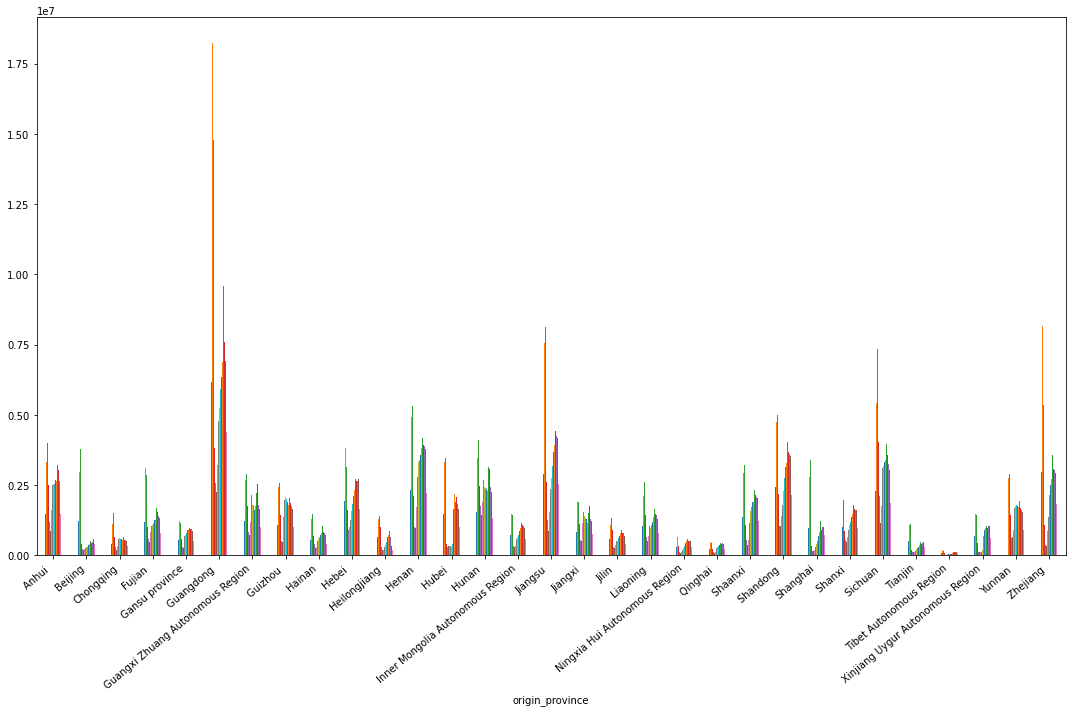

In [31]:
# Plotting a bar plot to understand the main hotspots in the origin cities for travelling
ax=o_prov.plot(kind='bar')
plt.gcf().set_size_inches(15, 10)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.get_legend().remove()
plt.tight_layout()
#plt.savefig('./Media/origin_mobility.png') 
plt.show()


In [32]:
# aggregating by weeks for origin city
df_orig=o.groupby(['origin_city']).sum()

In [33]:
o.groupby(['origin_province']).max()

,origin_city,2020-01-12 00:00:00,2020-01-19 00:00:00,2020-01-26 00:00:00,2020-02-02 00:00:00,2020-02-09 00:00:00,2020-02-16 00:00:00,2020-02-23 00:00:00,2020-03-01 00:00:00,2020-03-08 00:00:00,2020-03-15 00:00:00,2020-03-22 00:00:00,2020-03-29 00:00:00,2020-04-05 00:00:00,2020-04-12 00:00:00,2020-04-19 00:00:00,2020-04-26 00:00:00,2020-05-03 00:00:00
origin_province,,,,,,,,,,,,,,,,,,
Anhui,Xuancheng,46445,113075,188091,68208,34470,25241,36143,54198,58289,64028,72641,77170,114256,89512,75260,68670,41588
Beijing,Beijing,202510,320624,280231,59109,54385,53520,63472,80009,94461,106881,125485,144244,166631,155362,177649,199196,118031
Chongqing,Chongqing,45455,105901,182117,86786,27456,11984,18071,31416,34363,40173,46505,54530,71564,73262,65432,63322,38600
Fujian,Zhangzhou,74116,130670,200640,64424,47152,45322,57892,74061,81103,91344,98265,100294,143797,118227,106219,94286,54663
Gansu province,Zhangye,26316,56008,77258,25543,11375,11168,18562,30799,32808,35384,39321,39511,42317,41266,37670,34868,20396
Guangdong,Zhuhai city,238145,438085,212975,72036,74333,99046,134575,200937,257190,310956,340345,365848,410584,366147,406575,388885,211469
Guangxi Zhuang Autonomous Region,Yulin,40035,79028,125743,60853,17814,18292,31864,50836,38781,47411,43947,79651,85755,81992,53014,49498,28541
Guizhou,Zunyi,75103,150062,212229,113007,24454,21912,85381,108263,108851,109498,106127,102526,139500,119694,94931,88786,55733
Hainan,Wuzhishan,23607,51466,75191,29708,16486,13107,14195,23572,29585,34039,36226,38886,57607,44333,41021,37115,21895


In [34]:
df_orig.head()

,2020-01-12 00:00:00,2020-01-19 00:00:00,2020-01-26 00:00:00,2020-02-02 00:00:00,2020-02-09 00:00:00,2020-02-16 00:00:00,2020-02-23 00:00:00,2020-03-01 00:00:00,2020-03-08 00:00:00,2020-03-15 00:00:00,2020-03-22 00:00:00,2020-03-29 00:00:00,2020-04-05 00:00:00,2020-04-12 00:00:00,2020-04-19 00:00:00,2020-04-26 00:00:00,2020-05-03 00:00:00
origin_city,,,,,,,,,,,,,,,,,
of Yantai,164544,293605,312425,138954,59671,48654,60069,75750,89058,112264,137459,152315,194506,183007,168688,168351,107125
Aba Tibetan and Qiang Autonomous Prefecture,36203,79901,63525,26112,11896,6322,8487,16505,15433,16948,21330,29469,43933,45064,46055,44384,34454
Aksu region,37300,88930,63278,17325,5873,4958,5529,7797,12366,30401,44945,50477,51659,49160,55331,55068,32554
Ali area,1166,2043,1724,531,344,392,459,491,549,574,815,1248,1929,1599,2024,2284,1467
Altay region,14176,30688,26848,10056,2634,2310,2045,2963,4992,17858,20892,21063,23778,23663,25513,26120,15743


In [35]:
#df_orig.to_csv('./Data/origin_city_by_week.csv')

In [36]:
df_orig.shape

(356, 17)

In [51]:
# Trying to pivot the data file 
visual_df=df2.set_index(['origin_city','origin_province','city_id_o','X_o','Y_o','dest_city','dest_province','city_id_d','X_d','Y_d']).stack().reset_index().rename(columns = {'level_10' : 'Date', 0: 'Val'})

In [52]:
visual_df.head()

,origin_city,origin_province,city_id_o,X_o,Y_o,dest_city,dest_province,city_id_d,X_d,Y_d,Date,Val
0,Wanning,Hainan,469006,110.395985,18.795179,Qitaihe,Heilongjiang,230900,130.9292,45.7842,20200110,0
1,Wanning,Hainan,469006,110.395985,18.795179,Qitaihe,Heilongjiang,230900,130.9292,45.7842,20200111,0
2,Wanning,Hainan,469006,110.395985,18.795179,Qitaihe,Heilongjiang,230900,130.9292,45.7842,20200112,0
3,Wanning,Hainan,469006,110.395985,18.795179,Qitaihe,Heilongjiang,230900,130.9292,45.7842,20200113,0
4,Wanning,Hainan,469006,110.395985,18.795179,Qitaihe,Heilongjiang,230900,130.9292,45.7842,20200114,0


In [54]:
visual_df['Date'].dtypes

dtype('O')

In [56]:
# converting to datetime format
visual_df['Date'] = pd.to_datetime(visual_df['Date'], format= '%Y/%m/%d')

In [58]:
visual_df.head()

,origin_city,origin_province,city_id_o,X_o,Y_o,dest_city,dest_province,city_id_d,X_d,Y_d,Date,Val
0,Wanning,Hainan,469006,110.395985,18.795179,Qitaihe,Heilongjiang,230900,130.9292,45.7842,2020-01-10,0
1,Wanning,Hainan,469006,110.395985,18.795179,Qitaihe,Heilongjiang,230900,130.9292,45.7842,2020-01-11,0
2,Wanning,Hainan,469006,110.395985,18.795179,Qitaihe,Heilongjiang,230900,130.9292,45.7842,2020-01-12,0
3,Wanning,Hainan,469006,110.395985,18.795179,Qitaihe,Heilongjiang,230900,130.9292,45.7842,2020-01-13,0
4,Wanning,Hainan,469006,110.395985,18.795179,Qitaihe,Heilongjiang,230900,130.9292,45.7842,2020-01-14,0


In [57]:
visual_df.dtypes

origin_city                object
origin_province            object
city_id_o                  object
X_o                       float64
Y_o                       float64
dest_city                  object
dest_province              object
city_id_d                  object
X_d                       float64
Y_d                       float64
Date               datetime64[ns]
Val                         int64
dtype: object

In [64]:
origin_city=visual_df.groupby(['origin_city','Date']).sum()

In [60]:
#visual_df.to_csv('./Data/visual.csv')

In [65]:
#origin_city.to_csv('./Data/origin_city_by_date.csv')

Departure City Analysis

In [44]:
dep=df2.drop(df2.iloc[:, 0:5], axis=1)
dep.head()

,dest_city,dest_province,city_id_d,X_d,Y_d,20200110,20200111,20200112,20200113,20200114,20200115,20200116,20200117,20200118,20200119,20200120,20200121,20200122,20200123,20200124,20200125,20200126,20200127,20200128,20200129,20200130,20200131,20200201,20200202,20200203,20200204,20200205,20200206,20200207,20200208,20200209,20200210,20200211,20200212,20200213,20200214,20200215,20200216,20200217,20200218,20200219,20200220,20200221,20200222,20200223,20200224,20200225,20200226,20200227,20200228,20200229,20200301,20200302,20200303,20200304,20200305,20200306,20200307,20200308,20200309,20200310,20200311,20200312,20200313,20200314,20200315,20200316,20200317,20200318,20200319,20200320,20200321,20200322,20200323,20200324,20200325,20200326,20200327,20200328,20200329,20200330,20200331,20200401,20200402,20200403,20200404,20200405,20200406,20200407,20200408,20200409,20200410,20200411,20200412,20200413,20200414,20200415,20200416,20200417,20200418,20200419,20200420,20200421,20200422,20200423,20200424,20200425,20200426,20200427,20200428,20200429,20200430
0,Qitaihe,Heilongjiang,230900,130.9292,45.7842,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,2,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,7,4,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,2,0,0,0
1,Qitaihe,Heilongjiang,230900,130.9292,45.7842,3,3,5,6,3,4,3,7,4,4,4,4,6,3,6,6,3,4,2,3,12,4,4,2,2,8,2,8,3,3,5,0,1,2,4,2,2,5,1,5,0,2,0,8,1,4,5,0,0,4,3,3,0,13,3,2,3,2,4,5,9,6,5,6,0,0,1,1,2,1,4,4,2,6,1,8,3,3,3,3,3,5,6,2,3,3,6,2,4,2,1,5,15,11,1,7,7,2,6,2,6,6,4,3,1,4,2,9,2,0,1,0
2,Qitaihe,Heilongjiang,230900,130.9292,45.7842,0,0,0,0,1,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
3,Qitaihe,Heilongjiang,230900,130.9292,45.7842,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Qitaihe,Heilongjiang,230900,130.9292,45.7842,0,0,0,0,0,0,1,2,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [45]:
dep_df=dep.drop(dep.iloc[:, 3:6], axis=1)
dep_df.head()

,dest_city,dest_province,city_id_d,20200111,20200112,20200113,20200114,20200115,20200116,20200117,20200118,20200119,20200120,20200121,20200122,20200123,20200124,20200125,20200126,20200127,20200128,20200129,20200130,20200131,20200201,20200202,20200203,20200204,20200205,20200206,20200207,20200208,20200209,20200210,20200211,20200212,20200213,20200214,20200215,20200216,20200217,20200218,20200219,20200220,20200221,20200222,20200223,20200224,20200225,20200226,20200227,20200228,20200229,20200301,20200302,20200303,20200304,20200305,20200306,20200307,20200308,20200309,20200310,20200311,20200312,20200313,20200314,20200315,20200316,20200317,20200318,20200319,20200320,20200321,20200322,20200323,20200324,20200325,20200326,20200327,20200328,20200329,20200330,20200331,20200401,20200402,20200403,20200404,20200405,20200406,20200407,20200408,20200409,20200410,20200411,20200412,20200413,20200414,20200415,20200416,20200417,20200418,20200419,20200420,20200421,20200422,20200423,20200424,20200425,20200426,20200427,20200428,20200429,20200430
0,Qitaihe,Heilongjiang,230900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,2,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,7,4,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,2,0,0,0
1,Qitaihe,Heilongjiang,230900,3,5,6,3,4,3,7,4,4,4,4,6,3,6,6,3,4,2,3,12,4,4,2,2,8,2,8,3,3,5,0,1,2,4,2,2,5,1,5,0,2,0,8,1,4,5,0,0,4,3,3,0,13,3,2,3,2,4,5,9,6,5,6,0,0,1,1,2,1,4,4,2,6,1,8,3,3,3,3,3,5,6,2,3,3,6,2,4,2,1,5,15,11,1,7,7,2,6,2,6,6,4,3,1,4,2,9,2,0,1,0
2,Qitaihe,Heilongjiang,230900,0,0,0,1,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
3,Qitaihe,Heilongjiang,230900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Qitaihe,Heilongjiang,230900,0,0,0,0,0,1,2,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [46]:
dep_df.drop(['city_id_d'],axis=1)
dep_df.head()

,dest_city,dest_province,city_id_d,20200111,20200112,20200113,20200114,20200115,20200116,20200117,20200118,20200119,20200120,20200121,20200122,20200123,20200124,20200125,20200126,20200127,20200128,20200129,20200130,20200131,20200201,20200202,20200203,20200204,20200205,20200206,20200207,20200208,20200209,20200210,20200211,20200212,20200213,20200214,20200215,20200216,20200217,20200218,20200219,20200220,20200221,20200222,20200223,20200224,20200225,20200226,20200227,20200228,20200229,20200301,20200302,20200303,20200304,20200305,20200306,20200307,20200308,20200309,20200310,20200311,20200312,20200313,20200314,20200315,20200316,20200317,20200318,20200319,20200320,20200321,20200322,20200323,20200324,20200325,20200326,20200327,20200328,20200329,20200330,20200331,20200401,20200402,20200403,20200404,20200405,20200406,20200407,20200408,20200409,20200410,20200411,20200412,20200413,20200414,20200415,20200416,20200417,20200418,20200419,20200420,20200421,20200422,20200423,20200424,20200425,20200426,20200427,20200428,20200429,20200430
0,Qitaihe,Heilongjiang,230900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,2,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,7,4,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,2,0,0,0
1,Qitaihe,Heilongjiang,230900,3,5,6,3,4,3,7,4,4,4,4,6,3,6,6,3,4,2,3,12,4,4,2,2,8,2,8,3,3,5,0,1,2,4,2,2,5,1,5,0,2,0,8,1,4,5,0,0,4,3,3,0,13,3,2,3,2,4,5,9,6,5,6,0,0,1,1,2,1,4,4,2,6,1,8,3,3,3,3,3,5,6,2,3,3,6,2,4,2,1,5,15,11,1,7,7,2,6,2,6,6,4,3,1,4,2,9,2,0,1,0
2,Qitaihe,Heilongjiang,230900,0,0,0,1,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
3,Qitaihe,Heilongjiang,230900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Qitaihe,Heilongjiang,230900,0,0,0,0,0,1,2,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [47]:
# aggregating destination city and province data weekly
d= dep_df.set_index(['dest_city','dest_province','city_id_d']).rename(columns=lambda x: pd.to_datetime(x))
d = d.resample('W', axis=1).sum().reset_index()
d.head(20)

,dest_city,dest_province,city_id_d,2020-01-12 00:00:00,2020-01-19 00:00:00,2020-01-26 00:00:00,2020-02-02 00:00:00,2020-02-09 00:00:00,2020-02-16 00:00:00,2020-02-23 00:00:00,2020-03-01 00:00:00,2020-03-08 00:00:00,2020-03-15 00:00:00,2020-03-22 00:00:00,2020-03-29 00:00:00,2020-04-05 00:00:00,2020-04-12 00:00:00,2020-04-19 00:00:00,2020-04-26 00:00:00,2020-05-03 00:00:00
0,Qitaihe,Heilongjiang,230900,0,0,0,2,3,1,2,0,12,2,0,0,0,1,2,0,2
1,Qitaihe,Heilongjiang,230900,8,31,32,31,31,16,17,19,27,31,15,27,28,40,31,29,3
2,Qitaihe,Heilongjiang,230900,0,4,0,0,1,0,0,0,0,0,0,0,0,3,0,2,0
3,Qitaihe,Heilongjiang,230900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Qitaihe,Heilongjiang,230900,0,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
5,Qitaihe,Heilongjiang,230900,30,170,232,66,11,6,7,10,11,11,18,17,32,20,29,23,17
6,Qitaihe,Heilongjiang,230900,0,3,1,0,0,0,0,0,0,0,0,2,0,0,0,0,0
7,Qitaihe,Heilongjiang,230900,0,1,4,4,9,4,1,4,2,6,1,3,7,2,11,14,0
8,Qitaihe,Heilongjiang,230900,2,24,16,5,2,0,0,0,2,5,1,5,2,4,10,6,1
9,Qitaihe,Heilongjiang,230900,19,37,7,5,2,0,0,1,2,3,1,0,1,3,1,1,1


In [48]:
d_prov=d.groupby(['dest_province']).sum()
d_prov.head()

,2020-01-12 00:00:00,2020-01-19 00:00:00,2020-01-26 00:00:00,2020-02-02 00:00:00,2020-02-09 00:00:00,2020-02-16 00:00:00,2020-02-23 00:00:00,2020-03-01 00:00:00,2020-03-08 00:00:00,2020-03-15 00:00:00,2020-03-22 00:00:00,2020-03-29 00:00:00,2020-04-05 00:00:00,2020-04-12 00:00:00,2020-04-19 00:00:00,2020-04-26 00:00:00,2020-05-03 00:00:00
dest_province,,,,,,,,,,,,,,,,,
Anhui,1319789,5889344,6831671,1667359,757345,594726,855113,1505491,1721953,1989388,2360565,2527882,3316614,2753933,2610955,2535826,1627403
Beijing,621020,1882203,1113236,1282703,738350,508668,468329,480359,447196,486785,542607,584425,658558,668389,624138,681196,421980
Chongqing,412072,1711637,1598406,624816,271453,161189,242827,417476,420613,445815,489830,510590,582764,558229,525649,514571,330814
Fujian,708906,2472427,2649885,1055940,575642,493340,894617,1229077,1242700,1297731,1334701,1320550,1715387,1550385,1397751,1308179,797244
Gansu province,435661,1485202,1566450,548003,252538,232174,370534,640447,682581,781605,873426,885979,975362,925280,922966,882426,526277


In [49]:
d_prov['dest_province']=d_prov.index

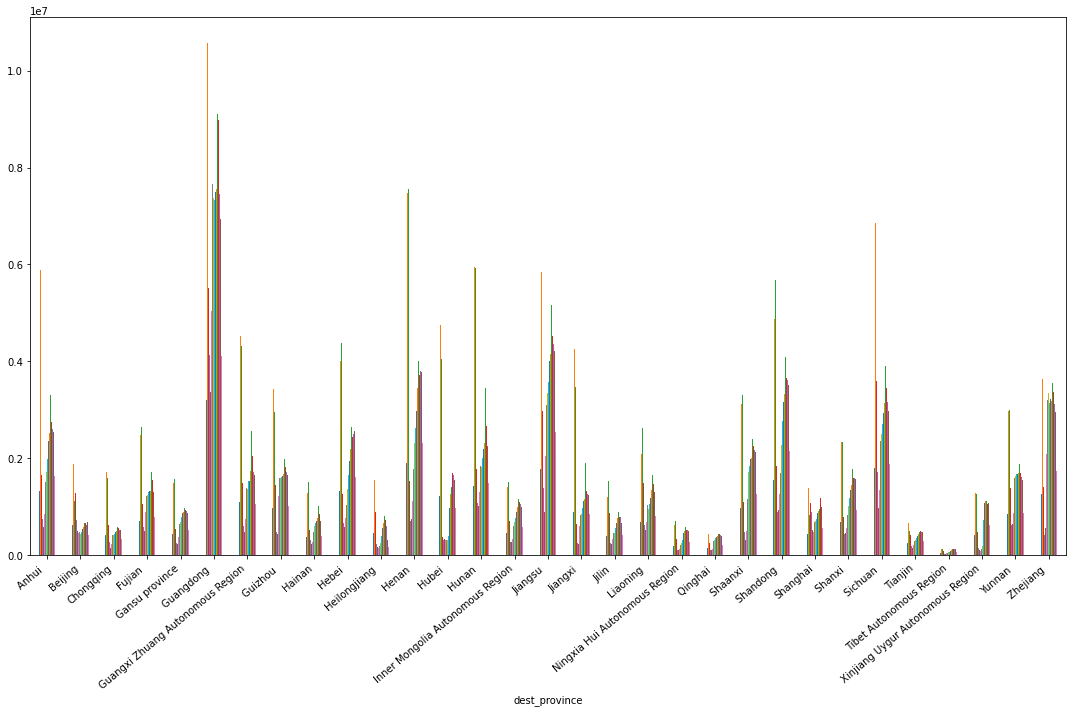

In [43]:
# Plotting a bar plot to understand the main hotspots in the destination cities for travelling
ax=d_prov.plot(kind='bar')
plt.gcf().set_size_inches(15, 10)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.get_legend().remove()
plt.tight_layout()
#plt.savefig('./Media/destination_mobility.png')
plt.show()


#### Preliminary Explorations

In [21]:
# creating points for each row in the data frame
origin_geom = [Point(xy) for xy in zip(df2["X_o"],df2["Y_o"])]
origin_geom[:3]

In [22]:
dest_geom = [Point(xy) for xy in zip(df2["X_d"],df2["Y_d"])]
dest_geom[:3]


In [27]:
# creating a new data frame to plot through geopandas
geo_df=gpd.GeoDataFrame(df2,crs=crs,geometry=origin_geom)
geo_df.head()

,city_id_o,X_o,Y_o,city_id_d,X_d,Y_d,20200110,20200111,20200112,20200113,20200114,20200115,20200116,20200117,20200118,20200119,20200120,20200121,20200122,20200123,20200124,20200125,20200126,20200127,20200128,20200129,20200130,20200131,20200201,20200202,20200203,20200204,20200205,20200206,20200207,20200208,20200209,20200210,20200211,20200212,20200213,20200214,20200215,20200216,20200217,20200218,20200219,20200220,20200221,20200222,20200223,20200224,20200225,20200226,20200227,20200228,20200229,20200301,20200302,20200303,20200304,20200305,20200306,20200307,20200308,20200309,20200310,20200311,20200312,20200313,20200314,20200315,20200316,20200317,20200318,20200319,20200320,20200321,20200322,20200323,20200324,20200325,20200326,20200327,20200328,20200329,20200330,20200331,20200401,20200402,20200403,20200404,20200405,20200406,20200407,20200408,20200409,20200410,20200411,20200412,20200413,20200414,20200415,20200416,20200417,20200418,20200419,20200420,20200421,20200422,20200423,20200424,20200425,20200426,20200427,20200428,20200429,20200430,origin_city,dest_city,origin_province,dest_province,geometry
0,469006,110.395985,18.795179,230900,130.9292,45.7842,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,2,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,7,4,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,2,0,0,0,Wanning,Qitaihe,Hainan,Heilongjiang,POINT (110.39598 18.79518)
1,460200,109.508000,18.256600,230900,130.9292,45.7842,3,3,5,6,3,4,3,7,4,4,4,4,6,3,6,6,3,4,2,3,12,4,4,2,2,8,2,8,3,3,5,0,1,2,4,2,2,5,1,5,0,2,0,8,1,4,5,0,0,4,3,3,0,13,3,2,3,2,4,5,9,6,5,6,0,0,1,1,2,1,4,4,2,6,1,8,3,3,3,3,3,5,6,2,3,3,6,2,4,2,1,5,15,11,1,7,7,2,6,2,6,6,4,3,1,4,2,9,2,0,1,0,Sanya,Qitaihe,Hainan,Heilongjiang,POINT (109.50800 18.25660)
2,350400,117.629800,26.265600,230900,130.9292,45.7842,0,0,0,0,1,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,Sanming,Qitaihe,Fujian,Heilongjiang,POINT (117.62980 26.26560)
3,460300,112.334000,16.832200,230900,130.9292,45.7842,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Sansha,Qitaihe,Hainan,Heilongjiang,POINT (112.33400 16.83220)
4,411200,111.196200,34.774600,230900,130.9292,45.7842,0,0,0,0,0,0,1,2,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Sanmenxia,Qitaihe,Henan,Heilongjiang,POINT (111.19620 34.77460)


In [28]:
# creating a new data frame to plot through geopandas
geo_df2=gpd.GeoDataFrame(df2,crs=crs,geometry=dest_geom)
geo_df2.head()

,city_id_o,X_o,Y_o,city_id_d,X_d,Y_d,20200110,20200111,20200112,20200113,20200114,20200115,20200116,20200117,20200118,20200119,20200120,20200121,20200122,20200123,20200124,20200125,20200126,20200127,20200128,20200129,20200130,20200131,20200201,20200202,20200203,20200204,20200205,20200206,20200207,20200208,20200209,20200210,20200211,20200212,20200213,20200214,20200215,20200216,20200217,20200218,20200219,20200220,20200221,20200222,20200223,20200224,20200225,20200226,20200227,20200228,20200229,20200301,20200302,20200303,20200304,20200305,20200306,20200307,20200308,20200309,20200310,20200311,20200312,20200313,20200314,20200315,20200316,20200317,20200318,20200319,20200320,20200321,20200322,20200323,20200324,20200325,20200326,20200327,20200328,20200329,20200330,20200331,20200401,20200402,20200403,20200404,20200405,20200406,20200407,20200408,20200409,20200410,20200411,20200412,20200413,20200414,20200415,20200416,20200417,20200418,20200419,20200420,20200421,20200422,20200423,20200424,20200425,20200426,20200427,20200428,20200429,20200430,origin_city,dest_city,origin_province,dest_province,geometry
0,469006,110.395985,18.795179,230900,130.9292,45.7842,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,2,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,7,4,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,2,0,0,0,Wanning,Qitaihe,Hainan,Heilongjiang,POINT (130.92920 45.78420)
1,460200,109.508000,18.256600,230900,130.9292,45.7842,3,3,5,6,3,4,3,7,4,4,4,4,6,3,6,6,3,4,2,3,12,4,4,2,2,8,2,8,3,3,5,0,1,2,4,2,2,5,1,5,0,2,0,8,1,4,5,0,0,4,3,3,0,13,3,2,3,2,4,5,9,6,5,6,0,0,1,1,2,1,4,4,2,6,1,8,3,3,3,3,3,5,6,2,3,3,6,2,4,2,1,5,15,11,1,7,7,2,6,2,6,6,4,3,1,4,2,9,2,0,1,0,Sanya,Qitaihe,Hainan,Heilongjiang,POINT (130.92920 45.78420)
2,350400,117.629800,26.265600,230900,130.9292,45.7842,0,0,0,0,1,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,Sanming,Qitaihe,Fujian,Heilongjiang,POINT (130.92920 45.78420)
3,460300,112.334000,16.832200,230900,130.9292,45.7842,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Sansha,Qitaihe,Hainan,Heilongjiang,POINT (130.92920 45.78420)
4,411200,111.196200,34.774600,230900,130.9292,45.7842,0,0,0,0,0,0,1,2,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Sanmenxia,Qitaihe,Henan,Heilongjiang,POINT (130.92920 45.78420)


In [29]:
geo_df.shape

(133590, 123)

In [30]:
geo_df2.shape

(133590, 123)

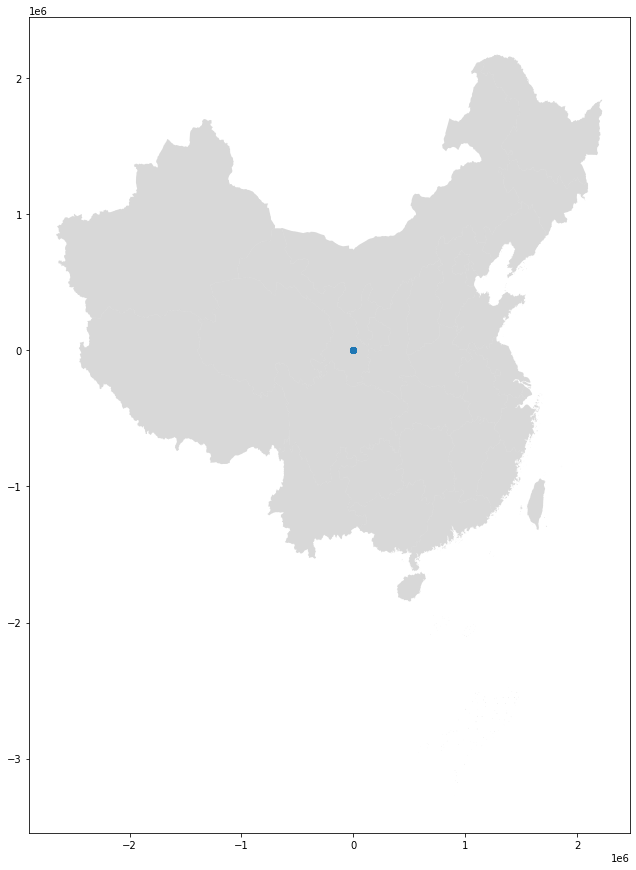

In [31]:
# creating a map of points for orign points on the base map
fig,ax = plt.subplots(figsize =(15,15))
prov_map.plot(ax=ax,alpha=0.3,color='grey')
geo_df.plot(ax = ax)
plt.show()

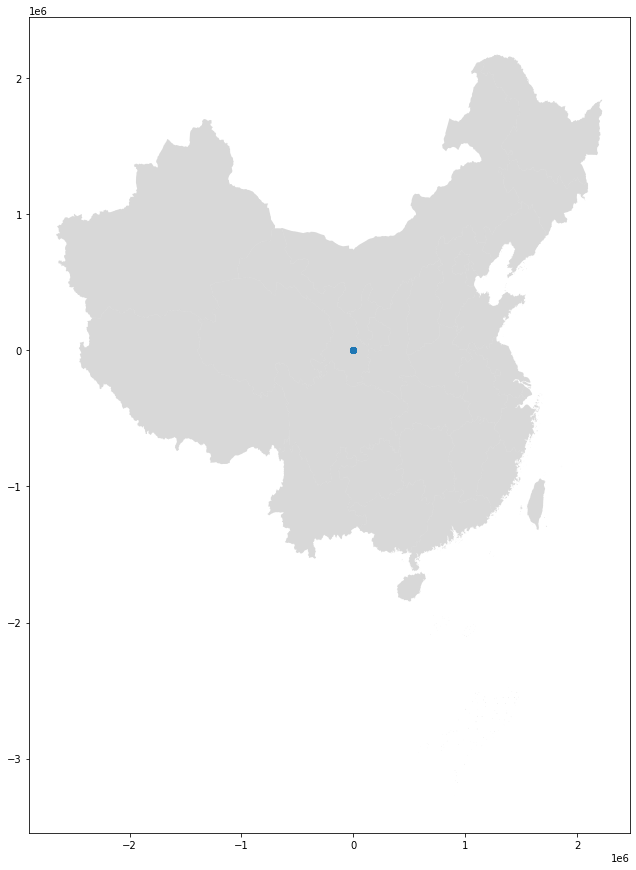

In [32]:
# creating a map of points for destination points on the base map
fig,ax = plt.subplots(figsize =(15,15))
prov_map.plot(ax=ax,alpha=0.3,color='grey')
geo_df2.plot(ax = ax)
plt.show()

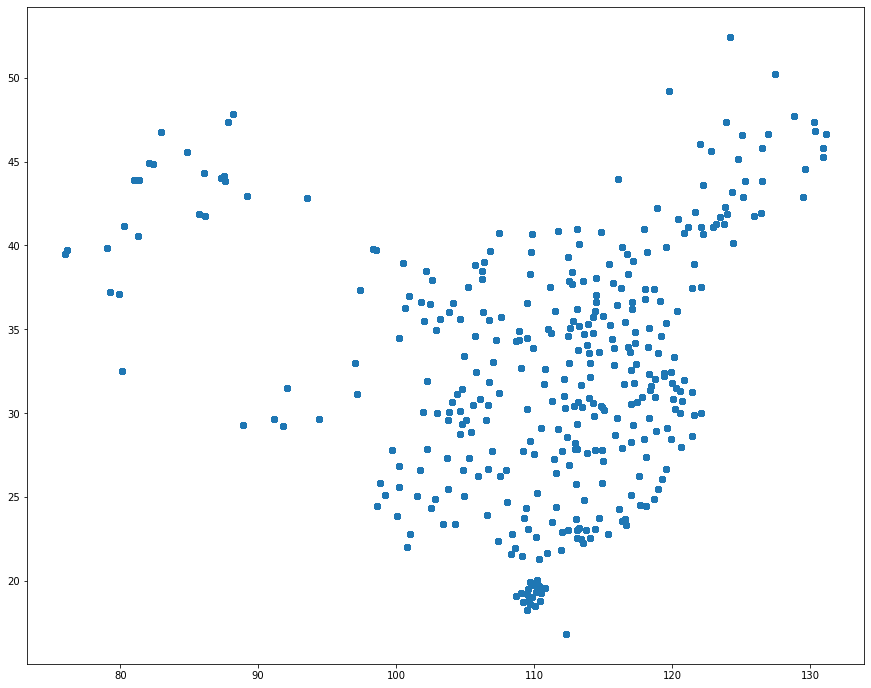

In [35]:
# points for destination points
fig,ax = plt.subplots(figsize =(15,15))
geo_df2.plot(ax = ax)
plt.show()